## 0. Computer vision libaries in PyTorch

* [torchvision ] (https://www.learnpytorch.io/03_pytorch_computer_vision/) - base
domain library for PyTorch computer vision
* `torchvision.datasets' - get datasets and data loading functions for computer
vision here
* `torchvision.models' - get pretrained computer vision models that you can
leverage for your own problems
* `torchvision.transforms - functions for manipulating your vision data (images)
to be suitable for use with an ML model
* `torch.utils.data.Dataset' - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader - Creates a Python iterable over a dataset

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

## 1. Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.

In [2]:
# getting our training data
train_data = datasets.FashionMNIST(
    root='./vision_datasets', # address
    train=True, #purpose of dataset
    transform=torchvision.transforms.ToTensor(), #convert the data to tensor
    download=True , # want to downlord or not
    target_transform=None # how you want the target or label 
)


In [3]:
test_data = datasets.FashionMNIST(
    root='./vision_datasets', # address
    train=False, #purpose of dataset
    transform=torchvision.transforms.ToTensor(), #convert the data to tensor
    download=True , # want to downlord or not
    target_transform=None # how you want the target or label 
)

In [4]:
len(train_data),len(test_data)

(60000, 10000)

In [5]:
image,label = train_data[0]# see the index of target at the end
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
classes = train_data.classes
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
classes[9]# hence object at the index 0 of training data is of class 9 which is the ancle boot

'Ankle boot'

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
image.shape,label

(torch.Size([1, 28, 28]), 9)

In [10]:
class_to_indx = train_data.class_to_idx
class_to_indx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### visualising our data

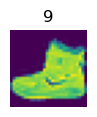

In [11]:
plt.figure(figsize=(1,1))
plt.imshow(image.squeeze())
plt.title(label)
plt.axis(False);

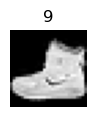

In [12]:
plt.figure(figsize=(1,1))
plt.imshow(image.squeeze(),cmap='gray')
plt.title(label)
plt.axis(False);

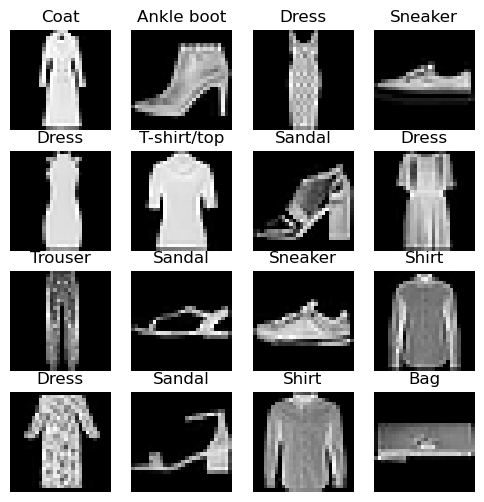

In [13]:
# lets plot many image together
torch.manual_seed(5)
fig = plt.figure(figsize=(6,6))
rows,columns = 4,4
for i in range(1,rows*columns+1):
    random_idx = torch.randint(0,len(train_data),size=[1]).item()
    image,label = train_data[random_idx]
    fig.add_subplot(rows,columns,i)
    plt.imshow(image.squeeze(),cmap='gray')
    plt.axis(False)
    plt.title(classes[label])

Do you think these items of clothing (images) could be modelled with pure linear lines? Or do you think we'll need non-linearities?

In [14]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: ./vision_datasets
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: ./vision_datasets
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be
able to look (store in memory) at 60000 images in one hit. So we break it down to
32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

In [15]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size = 32,
    shuffle=True          
)
test_dataloader = DataLoader(
    dataset=test_data,
    batch_size = 32,
    shuffle=False          
)

In [16]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x12686e723c0>,
 <torch.utils.data.dataloader.DataLoader at 0x1268f4dd450>)

here we get the number of batches after loarding data in the dataloader

In [17]:
len(train_dataloader),len(test_dataloader)

(1875, 313)

In [18]:
60000/32,10000/32

(1875.0, 312.5)

In [19]:
# iter will fetch a item from the data and next will fetch the first item or batch
train_feature_batch ,train_label_batch = next(iter(train_dataloader))

In [20]:
train_feature_batch.shape,train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

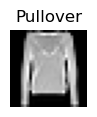

In [21]:
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_feature_batch),size=[1])
image,label = train_feature_batch[random_idx],train_label_batch[random_idx]
plt.figure(figsize=(1,1))
plt.imshow(image.squeeze(),cmap='gray')
plt.title(classes[label])
plt.axis(False);

## Model 0: Build a basline model

When starting to build a series of machine learning modelling experiments, it's
best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent
models/experiments.

In other words: start simply and add complexity when necessary.

In [22]:
# creating a flatten layer
flatten_model = nn.Flatten()
# get a single sample
x = train_feature_batch[0]
# flatten the sample
output = flatten_model(x)# perform forward pass 
# lets see changes occer here
print(f'before flattening : {x.shape} ->[color chennel,height,width]')
print(f'after flattening : {output.shape} ->[color chennel,height*width]')

before flattening : torch.Size([1, 28, 28]) ->[color chennel,height,width]
after flattening : torch.Size([1, 784]) ->[color chennel,height*width]


In [23]:
class fachionMNIST1(nn.Module):
    def __init__(self,
                 input_shape,
                 hidden_neuron,
                 output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_neuron),
            nn.Linear(in_features=hidden_neuron,
                      out_features=output_shape)
        )
    def forward(self,x):
        return self.layer_stack(x)

In [24]:
model0 = fachionMNIST1(
    input_shape= 784,
    hidden_neuron=10,
    output_shape = len(classes)
)

In [25]:
dummy = torch.rand(1,1,28,28)
model0(dummy)

tensor([[ 0.4283,  0.1136, -0.3903, -0.0246, -0.0698,  0.2508,  0.4007, -0.4172,
         -0.0264, -0.2463]], grad_fn=<AddmmBackward0>)

In [26]:
model0

fachionMNIST1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [27]:
model0.state_dict()# these our random vaues which our model consist of before training

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0296, -0.0084,  0.0328,  ...,  0.0093,  0.0135, -0.0188],
                      [-0.0354,  0.0187,  0.0085,  ..., -0.0001,  0.0115, -0.0008],
                      [ 0.0017,  0.0045,  0.0133,  ..., -0.0188,  0.0059,  0.0100],
                      ...,
                      [ 0.0273, -0.0344,  0.0127,  ...,  0.0283, -0.0011, -0.0230],
                      [ 0.0257,  0.0291,  0.0243,  ..., -0.0087,  0.0001,  0.0176],
                      [-0.0147,  0.0053, -0.0194,  ..., -0.0221,  0.0205, -0.0093]])),
             ('layer_stack.1.bias',
              tensor([ 0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,  0.0018,
                       0.0163,  0.0069])),
             ('layer_stack.2.weight',
              tensor([[-0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,  0.2019,
                        0.2847, -0.1495],
                      [ 0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will
be 'nn. CrossEntropyLoss ( )'
* Optimizer - our optimizer `torch.optim.SGD()' (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use
accruacy as our evaluation metric

In [28]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
    print ("helper_functions.py already exists, skipping download ... ")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open('helper_functions.py','wb') as f:
        f.write(request.content)

helper_functions.py already exists, skipping download ... 


In [29]:
from helper_functions import accuracy_fn

In [30]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr= 0.1)


In [31]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
#Prints difference between start and end time.
    total_time = end - start
    print(f"Train time on {device}: {total_time :.3f} seconds")
    return total_time

In [32]:
start_time = timer()
# code
end_time = timer()
print_train_time(start_time,end_time,device='cpu')

Train time on cpu: 0.000 seconds


7.270000060088933e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss
**per batch**.
3. Loop through testing batches, perform testing steps, calculate the test loss
*per batch *.
4. Print out what's happening.
5. Time it all (for fun).|

In [33]:
# help in getting progress bar
from tqdm.auto import tqdm
number_of_looping = 5
start_time = timer()
torch.manual_seed(42)
for number in tqdm(range(number_of_looping)):
    # this willbe the difault value which will get the incremented in the loop
    train_loss= 0
    # batch = index of batch we are using ,X = data or image ,y = target or label
    for batch , (X,y) in enumerate(train_dataloader):
        # training mode on 
        model0.train()
        # pred for single batch
        y_preds = model0(X)
        loss = loss_function(y_preds,y)
        # this will sumup the loss of each batch
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # printing our progress
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
    # finding our average loss
    train_loss /= len(train_dataloader)
    # the same procedure cotinue for testing loop
    test_loss,test_accuracy = 0,0
    model0.eval()
    with torch.inference_mode():
        for test_X,test_y in test_dataloader:
            test_preds = model0(test_X)
            test_loss += loss_function(test_preds,test_y)
            test_accuracy += accuracy_fn(y_pred=test_preds.argmax(dim=1),y_true=test_y)
        test_loss /= len(test_dataloader)
        test_accuracy /= len(test_dataloader)
    # Print out what's happening
    print(f"\nTrain loss: {train_loss :.4f} | Test loss: {test_loss :.4f}, Test acc: {test_accuracy :.4f}")

# Calculate training time
end_time = timer()
total_train_time_model_0 = print_train_time(start=start_time,
                                            end=end_time,
                                            device=str(next(model0.parameters ())))


  0%|          | 0/5 [00:00<?, ?it/s]

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5948 | Test loss: 0.5164, Test acc: 81.8391
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4795 | Test loss: 0.4814, Test acc: 83.1769
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4570 | Test loss: 0.4777, Test acc: 83.4964
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4438 | Test loss: 0.4638, Test acc: 83.6062
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train lo

In [34]:
def evaluator(model : torch.nn.Module,
              dataloader : torch.utils.data.dataloader,
              loss_function : torch.nn.Module,
              accuracy_function,
              device):
    loss,accuracy = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(dataloader):
            X,y = X.to(device),y.to(device)
            test_preds = model(X)
            loss += loss_function(test_preds,y)
            accuracy += accuracy_fn(y_true=y,y_pred=test_preds.argmax(dim=1))
        loss /= len(dataloader)
        accuracy /= len(dataloader)
    return {'model name': model.__class__.__name__,
            'model_loss': loss.item(),
            'model_accuracy': accuracy}

In [35]:
efficiency = evaluator(model=model0,
          dataloader=test_dataloader,
          loss_function=loss_function,
         accuracy_function=accuracy_fn,
                          device='cpu')

  0%|          | 0/313 [00:00<?, ?it/s]

In [36]:
efficiency

{'model name': 'fachionMNIST1',
 'model_loss': 0.4691453278064728,
 'model_accuracy': 83.2667731629393}

### setting up device agnostic code

In [37]:
# getting a gpu
!nvidia-smi

Mon Nov 17 08:04:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 577.03                 Driver Version: 577.03         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   51C    P8              1W /   30W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [38]:
torch.cuda.is_available()

True

In [39]:
device = 'cuda' if torch.cuda.is_available() else cpu

In [40]:
class fachionMNIST2(nn.Module):
    def __init__(self,
                 input_shape,
                 hidden_unit,
                 output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                     out_features=hidden_unit),
            nn.ReLU(),
            nn.Linear(in_features=hidden_unit,
                      out_features=output_shape),
        )
    def forward(self,x):
        return self.layer_stack(x)


In [41]:
model1 = fachionMNIST2(input_shape=784,
                       output_shape=len(classes),
                       hidden_unit=10).to(device)


In [42]:
next(model1.parameters()).device

device(type='cuda', index=0)

In [43]:
from helper_functions import accuracy_fn
loss_function = nn.CrossEntropyLoss()# calculate how wrong our model is 
optimizer = torch.optim.SGD(params=model1.parameters(),# tries to update the model to reduce loss
                            lr= 0.1)

In [44]:
torch.manual_seed(42)
number_of_looping = 3
def looper(model,train_data,test_data,number_of_looping,loss_function,optimizer):
    start_time = timer()
    for number in tqdm(range(number_of_looping)):
        train_loss = 0
        for batch,(X,y) in enumerate(train_data):
            X=X.to(device)
            y=y.to(device)
            model.train()
            train_preds = model(X)
            loss = loss_function(train_preds,y)
            train_loss+=loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if batch % 300 == 0 :
                print(f'looked at {(batch*len(X))}/{len(train_data.dataset)} samples')
        train_loss/=len(train_data)
        test_loss,test_accuracy= 0,0
        model.eval()
        with torch.inference_mode():
            for X_test,y_test in test_data:
                X_test=X_test.to(device)
                y_test=y_test.to(device)
                test_preds = model(X_test)
                test_loss += loss_function(test_preds,y_test)
                test_accuracy += accuracy_fn(y_pred=test_preds.argmax(dim=1),y_true=y_test)
            test_loss/=len(test_data)
            test_accuracy/=len(test_data)    
        print(f'train loss : {train_loss : .3f} | test_loss : {test_loss:.3f} | test_accuracy : {test_accuracy:.3f}')
    end_time = timer()
    total_train_time_model = print_train_time(start=start_time,
                                            end=end_time,
                                            device=str(next(model.parameters ())))


In [45]:
start_time = timer()
looper(model=model1,
       train_data=train_dataloader,
       test_data=test_dataloader,
       number_of_looping=3,
       loss_function=loss_function,
       optimizer= optimizer)
end_time = timer()
total_train_time_model_1 = print_train_time(start=start_time,
                                            end=end_time,
                                            device=str(next(model1.parameters())))


  0%|          | 0/3 [00:00<?, ?it/s]

looked at 0/60000 samples
looked at 9600/60000 samples
looked at 19200/60000 samples
looked at 28800/60000 samples
looked at 38400/60000 samples
looked at 48000/60000 samples
looked at 57600/60000 samples
train loss :  0.627 | test_loss : 0.502 | test_accuracy : 82.198
looked at 0/60000 samples
looked at 9600/60000 samples
looked at 19200/60000 samples
looked at 28800/60000 samples
looked at 38400/60000 samples
looked at 48000/60000 samples
looked at 57600/60000 samples
train loss :  0.471 | test_loss : 0.505 | test_accuracy : 82.089
looked at 0/60000 samples
looked at 9600/60000 samples
looked at 19200/60000 samples
looked at 28800/60000 samples
looked at 38400/60000 samples
looked at 48000/60000 samples
looked at 57600/60000 samples
train loss :  0.443 | test_loss : 0.471 | test_accuracy : 83.407
Train time on Parameter containing:
tensor([[-0.0115,  0.0214,  0.0029,  ..., -0.0099,  0.0057,  0.0216],
        [-0.0094,  0.0257,  0.0171,  ...,  0.0801, -0.0093,  0.0234],
        [-0.03

In [46]:
def trainer(model,train_data,number_of_looping):
    for number in tqdm(range(number_of_looping)):
        train_loss = 0
        for batch,(X,y) in enumerate(train_data):
            X=X.to(device)
            y=y.to(device)
            model.train()
            train_preds = model(X)
            loss = loss_function(train_preds,y)
            train_loss+=loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if batch % 300 == 0 :
                print(f'looked at {(batch*len(X))}/{len(train_data.dataset)} samples')
        train_loss/=len(train_data)
        print(f'training_loss : {train_loss}')
    

In [47]:
def tester(model,test_data):
    test_loss,test_accuracy= 0,0
    model.eval()
    with torch.inference_mode():
        for X_test,y_test in test_data:
            X_test=X_test.to(device)
            y_test=y_test.to(device)
            test_preds = model(X_test)
            test_loss += loss_function(test_preds,y_test)
            test_accuracy += accuracy_fn(y_pred=test_preds.argmax(dim=1),y_true=y_test)
        test_loss/=len(test_data)
        test_accuracy/=len(test_data)    
    print(f'test_loss : {test_loss:.3f} | test_accuracy : {test_accuracy:.3f}')

In [48]:
trainer(model1,train_dataloader,1)

  0%|          | 0/1 [00:00<?, ?it/s]

looked at 0/60000 samples
looked at 9600/60000 samples
looked at 19200/60000 samples
looked at 28800/60000 samples
looked at 38400/60000 samples
looked at 48000/60000 samples
looked at 57600/60000 samples
training_loss : 0.42749765515327454


In [49]:
tester(model1,test_dataloader)

test_loss : 0.450 | test_accuracy : 84.395


In [50]:
model0_result = evaluator(model0,test_dataloader,loss_function,accuracy_fn,'cpu')
model0_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'model name': 'fachionMNIST1',
 'model_loss': 0.4691453278064728,
 'model_accuracy': 83.2667731629393}

In [51]:
model1_result = evaluator(model1,test_dataloader,loss_function,accuracy_fn,device)
model1_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'model name': 'fachionMNIST2',
 'model_loss': 0.45006176829338074,
 'model_accuracy': 84.39496805111821}

## Convolutional Neural Network(CNN)
- CNN are also called as ConvNets
- CCN are generally used for visual data as when we go deep in the machanism of CNN we can easily understand the reason

In [52]:
# creating a convolutional neural network
class fachionMNIST3(nn.Module):
    def __init__(self,
                 input_shape,
                 hidden_units,
                 output_shape):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=(3,3),
                stride=1,
                padding = 1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3,3),
                stride= 1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=(2,2) 
            )
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3,3),
                stride= 1,
                padding= 1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels= hidden_units,
                kernel_size=(3,3),
                stride = 1,
                padding= 1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2)
            )
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units*7*7,
                out_features=output_shape
            )
        )
    def forward(self,x):
        x= x
        x1 = self.conv_block1(x)
        print(x1.shape)
        x2 = self.conv_block2(x1)
        print(x2.shape)
        x3 = self.classifier(x2)
        return x3


In [53]:
model2 = fachionMNIST3(
    input_shape=1,
    hidden_units=10,
    output_shape=len(classes)
).to(device)

In [54]:
model2

fachionMNIST3(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### trying a dummy value in a single convolutional layer with random values

In [55]:
torch.manual_seed(42)
random_image = torch.randn(size= (32,3,64,64))
test_image= random_image[0]
image.shape,test_image.shape

(torch.Size([1, 1, 28, 28]), torch.Size([3, 64, 64]))

In [56]:
convlutional_layer = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=(3,3),
    padding=0,
    stride=1
)

In [57]:
torch.manual_seed(42)
layer_output = convlutional_layer(test_image)
layer_output.shape

torch.Size([10, 62, 62])

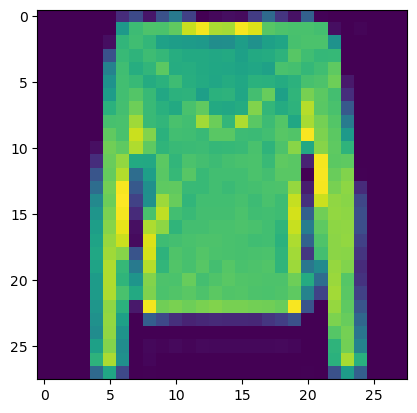

In [58]:
plt.imshow(image.squeeze())

In [59]:
random_image_tensor = torch.randn(size=(1,28,28)).to(device)

In [60]:
model2(random_image_tensor.unsqueeze(0))

torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])


tensor([[-0.0053, -0.0467, -0.0031, -0.0382,  0.0002, -0.0395,  0.0393,  0.0504,
         -0.0337,  0.0627]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [61]:
random_image_tensor.shape

torch.Size([1, 28, 28])

In [62]:
train_dataloader

### setup loss function and optimizer

### training and testing our model with the heplp looper ,trainer ,tester function

In [63]:
# creating a convolutional neural network
class fachionMNIST3(nn.Module):
    def __init__(self,
                 input_shape,
                 hidden_units,
                 output_shape):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=(3,3),
                stride=1,
                padding = 1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3,3),
                stride= 1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=(2,2) 
            )
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3,3),
                stride= 1,
                padding= 1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels= hidden_units,
                kernel_size=(3,3),
                stride = 1,
                padding= 1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2)
            )
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units*7*7,
                out_features=output_shape
            )
        )
    def forward(self,x):
        
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.classifier(x)
        
        return x

In [64]:
model2 = fachionMNIST3(input_shape=1,output_shape=10,hidden_units=10).to(device)

In [65]:
from helper_functions import accuracy_fn
loss_function= nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model2.parameters(),
                           lr=0.1)

In [66]:
start_time = timer()
looper(model=model2,train_data=train_dataloader,test_data=test_dataloader,number_of_looping=3,loss_function=loss_function,optimizer=optimizer)
end_time = timer()
total_train_time_model_2 = print_train_time(start=start_time,
                                            end=end_time,
                                            device=str(next(model2.parameters())))


  0%|          | 0/3 [00:00<?, ?it/s]

looked at 0/60000 samples
looked at 9600/60000 samples
looked at 19200/60000 samples
looked at 28800/60000 samples
looked at 38400/60000 samples
looked at 48000/60000 samples
looked at 57600/60000 samples
train loss :  0.584 | test_loss : 0.400 | test_accuracy : 85.613
looked at 0/60000 samples
looked at 9600/60000 samples
looked at 19200/60000 samples
looked at 28800/60000 samples
looked at 38400/60000 samples
looked at 48000/60000 samples
looked at 57600/60000 samples
train loss :  0.352 | test_loss : 0.358 | test_accuracy : 87.171
looked at 0/60000 samples
looked at 9600/60000 samples
looked at 19200/60000 samples
looked at 28800/60000 samples
looked at 38400/60000 samples
looked at 48000/60000 samples
looked at 57600/60000 samples
train loss :  0.317 | test_loss : 0.346 | test_accuracy : 87.560
Train time on Parameter containing:
tensor([[[[-0.9248, -1.1288,  0.3481],
          [-0.2866, -0.8184,  0.3621],
          [ 0.3104,  0.1048,  0.2000]]],


        [[[-0.2804,  0.2108, -0.3

In [67]:
model2_result = evaluator(
    model=model2,
    dataloader=test_dataloader,
    loss_function=loss_function,
    accuracy_function=accuracy_fn,
    device=device
)

  0%|          | 0/313 [00:00<?, ?it/s]

In [68]:
model2_result

{'model name': 'fachionMNIST3',
 'model_loss': 0.34559276700019836,
 'model_accuracy': 87.55990415335464}

In [69]:
import pandas as pd
model_performance = pd.DataFrame([
    model0_result,
    model1_result,
    model2_result
])

In [70]:
model_performance

,model name,model_loss,model_accuracy
0,fachionMNIST1,0.469145,83.266773
1,fachionMNIST2,0.450062,84.394968
2,fachionMNIST3,0.345593,87.559904


In [71]:
total_train_time_model_0

52.17967689999932

In [72]:
total_train_time_model_1

37.823721400003706

In [73]:
total_train_time_model_2

49.96618849999504

In [74]:
model_performance['training_time'] = [
    total_train_time_model_0,
    total_train_time_model_1,
    total_train_time_model_2
]

In [75]:
model_performance

,model name,model_loss,model_accuracy,training_time
0,fachionMNIST1,0.469145,83.266773,52.179677
1,fachionMNIST2,0.450062,84.394968,37.823721
2,fachionMNIST3,0.345593,87.559904,49.966188


In [76]:
model_performance['Device'] = [
    'cpu',
    'gpu',
    'gpu'
]

In [77]:
model_performance

,model name,model_loss,model_accuracy,training_time,Device
0,fachionMNIST1,0.469145,83.266773,52.179677,cpu
1,fachionMNIST2,0.450062,84.394968,37.823721,gpu
2,fachionMNIST3,0.345593,87.559904,49.966188,gpu


<BarContainer object of 3 artists>

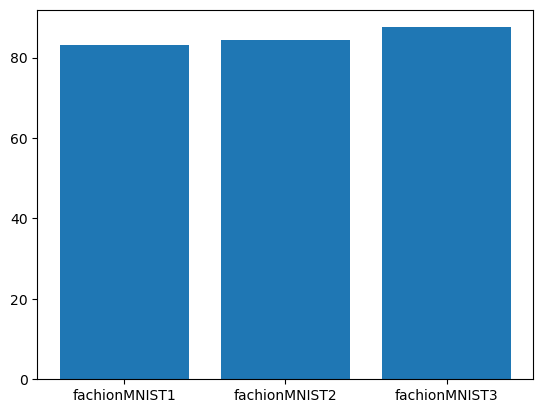

In [78]:
plt.bar(x=model_performance['model name'],height=model_performance['model_accuracy'])

In [79]:
def make_prediction(model : torch.nn.Module,
                    data : list ,
                    device : torch.device
                   ):
    pred_probs =[]
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample,dim=0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [80]:
import random
torch.manual_seed(42)
test_sample = []
test_label = []
torch.cuda.manual_seed(42)
for sample , label in random.sample(list(test_data),k=9):
    test_sample.append(sample)
    test_label.append(label)
test_sample[0].shape

torch.Size([1, 28, 28])

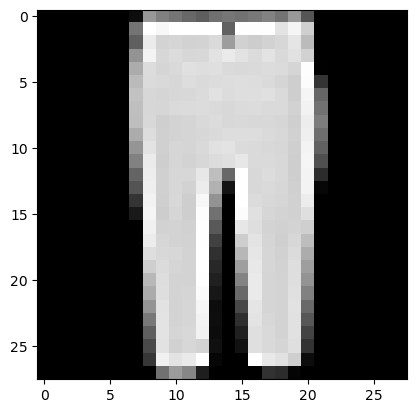

In [81]:
plt.imshow(X=test_sample[0].squeeze(),cmap= 'gray')

In [82]:
pred_probs = make_prediction(
    model=model2,
    data=test_sample,
    device = device
)
pred_probs[:2]

tensor([[5.2293e-04, 9.9897e-01, 2.8290e-06, 2.0277e-04, 1.1978e-04, 3.2053e-08,
         1.7579e-04, 1.7230e-07, 1.0629e-06, 1.0634e-08],
        [4.7516e-01, 6.8379e-05, 3.5686e-04, 4.2728e-02, 3.9834e-04, 1.3533e-07,
         4.8096e-01, 1.8952e-06, 3.2665e-04, 1.9928e-06]])

In [83]:
pred_classes = pred_probs.argmax(dim=1)

In [84]:
pred_classes

tensor([1, 6, 7, 7, 2, 1, 3, 5, 0])

In [85]:
test_label

[1, 6, 9, 7, 2, 1, 3, 5, 0]

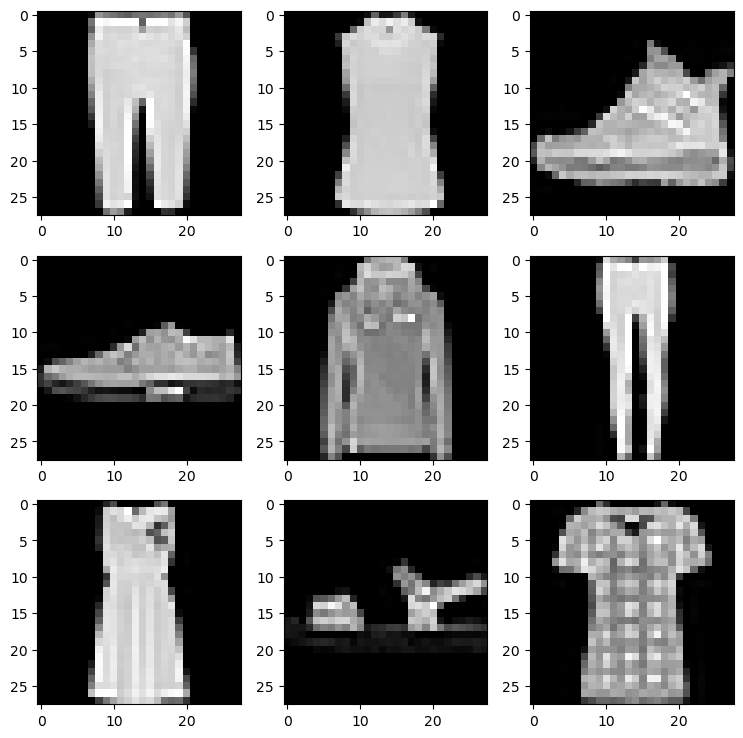

In [86]:
plt.figure(figsize=(9,9))
for i ,sample in enumerate(test_sample):
    plt.subplot(3,3,i+1)
    plt.imshow(X=sample.squeeze(),cmap='gray')


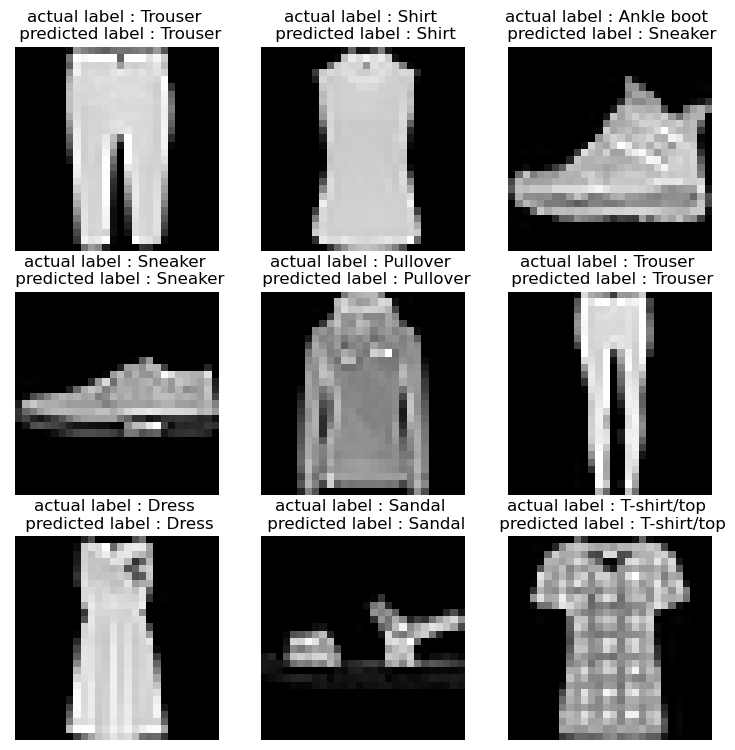

In [87]:
plt.figure(figsize=(9,9))
for i ,sample in enumerate(test_sample):
    plt.subplot(3,3,i+1)
    plt.imshow(X=sample.squeeze(),cmap='gray')
    plt.title(f'actual label : {classes[test_label[i]]} \n predicted label : {classes[pred_classes[i]]}')
    plt.axis(False)
    

In [88]:
 #

In [89]:
from tqdm.auto import tqdm
y_preds = []
model2.eval()
with torch.inference_mode():
    for X,y  in tqdm(test_dataloader,desc = 'Making prediction...'):
        X,y = X.to(device),y.to(device)
        y_logit = model2(X)
        y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())
print(y_preds[:10])
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making prediction...:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 7, 7, 5,
        1, 6, 6, 6, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 9, 6, 7, 2, 3, 4, 6, 4, 2, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 1, 3, 3, 7, 8, 7, 0, 2, 6, 4, 3, 1, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
        0, 6, 5, 3, 6, 7, 1, 6]), tensor([6, 1, 2, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 2, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 2]), tensor([1, 5, 4, 1, 9, 1, 8, 6, 2, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 3, 4,
        1, 4, 5, 6, 4, 7, 9, 3]), tensor([7, 2, 3, 9, 0, 9, 2, 7, 4, 2, 6, 5, 4, 1, 2, 1, 3, 6, 9, 1, 0, 9, 3, 8,
        7, 9, 9, 8, 4, 7, 1, 2]), tensor([3, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 3, 7, 0, 7, 8, 9, 2, 9, 0, 3, 1, 3, 4, 5, 4, 9, 2, 4, 8, 6, 4,
        6, 2, 9, 7, 3, 3, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 6, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4,
       

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [90]:
y_pred_tensor

tensor([9, 2, 1,  ..., 8, 1, 8])

### we will make use two method to sho our confusion matrix

#### let apply the method of showing a confusion matrix which we lerned in scikit learning

In [91]:
true_label = []
for X,y in test_dataloader:
    true_label.append(y)

In [92]:
true_label_tensor = torch.cat(true_label)

In [93]:
true_label_tensor.shape

torch.Size([10000])

In [94]:
true_label_numpy = true_label_tensor.numpy()
pred_label_numpy = y_pred_tensor.numpy()
true_label_numpy.dtype,pred_label_numpy.dtype

(dtype('int64'), dtype('int64'))

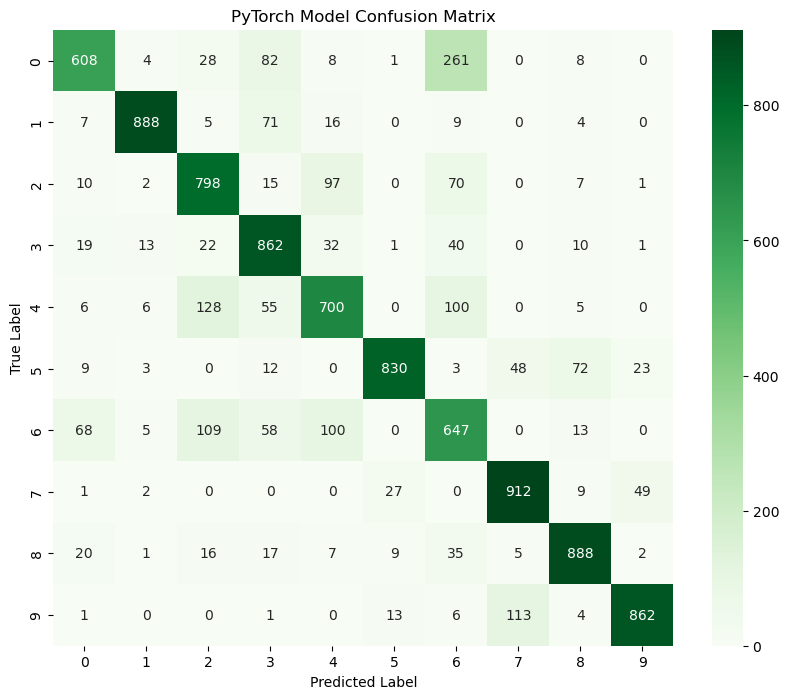

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

cm = confusion_matrix(true_label_numpy, pred_label_numpy)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm, 
    annot=True,        # Show the numbers in each cel
    fmt='d',           # Format as decimal/integer count
    cmap='Greens',      # Colormap
    cbar=True,
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('PyTorch Model Confusion Matrix')
plt.show()



In [96]:
!pip install -q torchmetrics -U mlxtend

### lets use the mlxtend , torch metrix

In [97]:
import mlxtend ,torchmetrics

In [98]:
mlxtend.__version__

'0.23.4'

In [99]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [100]:
cm = ConfusionMatrix(num_classes=len(classes),
                     task='multiclass')
cm_tensor = cm(preds = y_pred_tensor,
               target = test_data.targets)

In [101]:
cm_tensor

tensor([[608,   4,  28,  82,   8,   1, 261,   0,   8,   0],
        [  7, 888,   5,  71,  16,   0,   9,   0,   4,   0],
        [ 10,   2, 798,  15,  97,   0,  70,   0,   7,   1],
        [ 19,  13,  22, 862,  32,   1,  40,   0,  10,   1],
        [  6,   6, 128,  55, 700,   0, 100,   0,   5,   0],
        [  9,   3,   0,  12,   0, 830,   3,  48,  72,  23],
        [ 68,   5, 109,  58, 100,   0, 647,   0,  13,   0],
        [  1,   2,   0,   0,   0,  27,   0, 912,   9,  49],
        [ 20,   1,  16,  17,   7,   9,  35,   5, 888,   2],
        [  1,   0,   0,   1,   0,  13,   6, 113,   4, 862]])

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

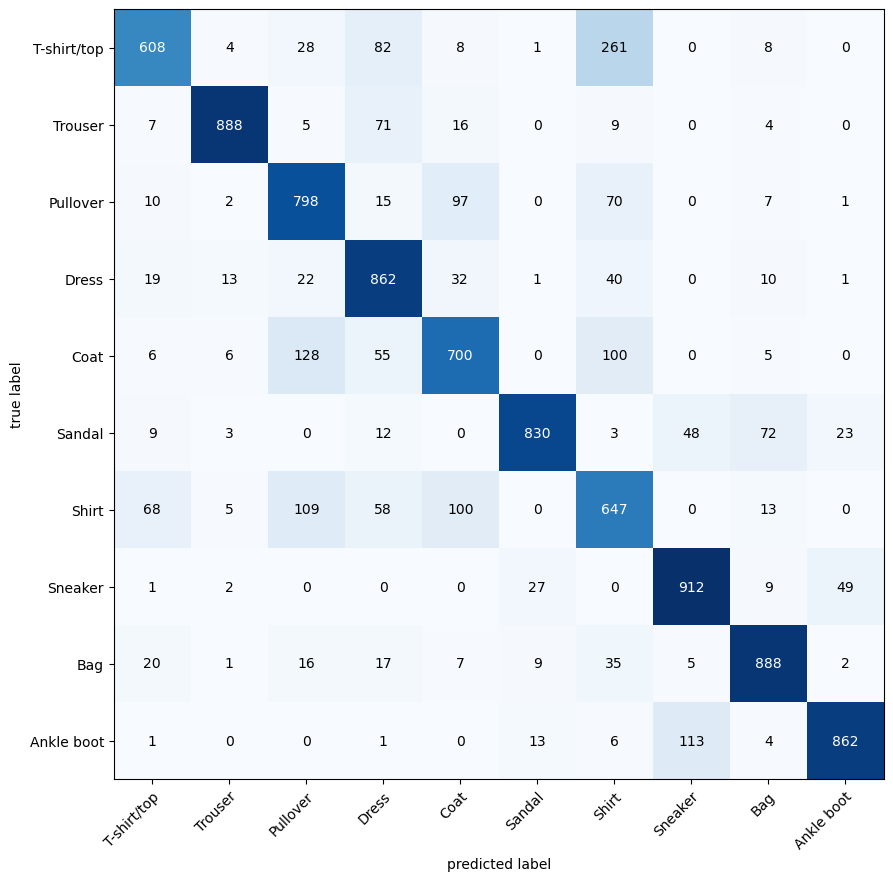

In [102]:
plot_confusion_matrix(
    conf_mat=cm_tensor.numpy(),
    figsize=(10,10),
    class_names=classes
)

## now we will save and load our best performing model

In [106]:
torch.save(obj=model2.state_dict(),
          f = './parameter_dictionary/convolutional_model_params.pth')

In [107]:
loaded_model = fachionMNIST3(input_shape=1,
                            output_shape=10,
                            hidden_units=10)

In [111]:
loaded_model.load_state_dict(torch.load('./parameter_dictionary/convolutional_model_params.pth', weights_only=False))
loaded_model.to(device)

fachionMNIST3(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [112]:
model2_result

{'model name': 'fachionMNIST3',
 'model_loss': 0.34559276700019836,
 'model_accuracy': 87.55990415335464}

In [113]:
torch.manual_seed(42)
loaded_model_result = evaluator(model=loaded_model,
                                dataloader=test_dataloader,
                                accuracy_function=accuracy_fn,
                                loss_function=loss_function,
                                device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [114]:
loaded_model_result

{'model name': 'fachionMNIST3',
 'model_loss': 0.34559276700019836,
 'model_accuracy': 87.55990415335464}

In [115]:
loaded_model_result == model2_result

True